<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.072170,35.094567,70.579910,38.246363,0.234203,244.227212,244.030110,0.197102
1,0.0,1.0,67.345397,83.292519,33.670566,66.401891,-0.084972,260.625401,260.700519,-0.075118
2,0.0,2.0,41.709323,74.652993,62.357641,91.201741,0.023961,279.945658,279.899244,0.046414
3,0.0,3.0,97.402571,55.396622,96.762656,87.052687,0.047971,346.662508,346.646886,0.015621
4,0.0,4.0,77.491587,56.556979,54.134835,59.177065,-0.025724,257.334743,257.369753,-0.035011
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.761763,97.684874,61.811562,35.645712,0.018227,268.922138,268.935053,-0.012915
29996,999.0,26.0,67.106111,48.819061,48.695161,20.829954,-0.026728,195.423559,195.479172,-0.055613
29997,999.0,27.0,85.232991,58.326433,23.445433,75.565967,-0.060549,252.510275,252.536428,-0.026153
29998,999.0,28.0,74.352475,80.081650,82.635044,66.664515,0.015295,313.748978,313.769577,-0.020599


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.072170  35.094567  70.579910  38.246363  0.234203  244.227212   
      1.0    67.345397  83.292519  33.670566  66.401891 -0.084972  260.625401   
      2.0    41.709323  74.652993  62.357641  91.201741  0.023961  279.945658   
      3.0    97.402571  55.396622  96.762656  87.052687  0.047971  346.662508   
      4.0    77.491587  56.556979  54.134835  59.177065 -0.025724  257.334743   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   63.761763  97.684874  61.811562  35.645712  0.018227  268.922138   
      26.0   67.106111  48.819061  48.695161  20.829954 -0.026728  195.423559   
      27.0   85.232991  58.326433  23.445433  75.565967 -0.060549  252.510275   
      28.0   74.352475  80.081650  82.635044  66.664515  0.015295  313.748978   
      29.0   21.961385  29.684532  79.536274  84.560056  0.079090  225.821338   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.030110  0.197102  
      1.0    260.700519 -0.075118  
      2.0    279.899244  0.046414  
      3.0    346.646886  0.015621  
      4.0    257.369753 -0.035011  
...                 ...       ...  
999.0 25.0   268.935053 -0.012915  
      26.0   195.479172 -0.055613  
      27.0   252.536428 -0.026153  
      28.0   313.769577 -0.020599  
      29.0   225.818832  0.002506  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.072170  35.094567  70.579910  38.246363  0.234203  244.227212   
      1.0    67.345397  83.292519  33.670566  66.401891 -0.084972  260.625401   
      2.0    41.709323  74.652993  62.357641  91.201741  0.023961  279.945658   
      3.0    97.402571  55.396622  96.762656  87.052687  0.047971  346.662508   
      4.0    77.491587  56.556979  54.134835  59.177065 -0.025724  257.334743   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   63.761763  97.684874  61.811562  35.645712  0.018227  268.922138   
      26.0   67.106111  48.819061  48.695161  20.829954 -0.026728  195.423559   
      27.0   85.232991  58.326433  23.445433  75.565967 -0.060549  252.510275   
      28.0   74.352475  80.081650  82.635044  66.664515  0.015295  313.748978   
      29.0   21.961385  29.684532  79.536274  84.560056  0.079090  225.821338   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.030110  0.197102  
      1.0    260.700519 -0.075118  
      2.0    279.899244  0.046414  
      3.0    346.646886  0.015621  
      4.0    257.369753 -0.035011  
...                 ...       ...  
999.0 25.0   268.935053 -0.012915  
      26.0   195.479172 -0.055613  
      27.0   252.536428 -0.026153  
      28.0   313.769577 -0.020599  
      29.0   225.818832  0.002506  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.072170,35.094567,70.579910,38.246363,0.234203,244.227212,244.030110,0.197102
1,0.0,1.0,67.345397,83.292519,33.670566,66.401891,-0.084972,260.625401,260.700519,-0.075118
2,0.0,2.0,41.709323,74.652993,62.357641,91.201741,0.023961,279.945658,279.899244,0.046414
3,0.0,3.0,97.402571,55.396622,96.762656,87.052687,0.047971,346.662508,346.646886,0.015621
4,0.0,4.0,77.491587,56.556979,54.134835,59.177065,-0.025724,257.334743,257.369753,-0.035011
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.761763,97.684874,61.811562,35.645712,0.018227,268.922138,268.935053,-0.012915
29996,999.0,26.0,67.106111,48.819061,48.695161,20.829954,-0.026728,195.423559,195.479172,-0.055613
29997,999.0,27.0,85.232991,58.326433,23.445433,75.565967,-0.060549,252.510275,252.536428,-0.026153
29998,999.0,28.0,74.352475,80.081650,82.635044,66.664515,0.015295,313.748978,313.769577,-0.020599


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.072170  35.094567  70.579910  38.246363  0.234203  244.227212   
      1.0    67.345397  83.292519  33.670566  66.401891 -0.084972  260.625401   
      2.0    41.709323  74.652993  62.357641  91.201741  0.023961  279.945658   
      3.0    97.402571  55.396622  96.762656  87.052687  0.047971  346.662508   
      4.0    77.491587  56.556979  54.134835  59.177065 -0.025724  257.334743   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   63.761763  97.684874  61.811562  35.645712  0.018227  268.922138   
      26.0   67.106111  48.819061  48.695161  20.829954 -0.026728  195.423559   
      27.0   85.232991  58.326433  23.445433  75.565967 -0.060549  252.510275   
      28.0   74.352475  80.081650  82.635044  66.664515  0.015295  313.748978   
      29.0   21.961385  29.684532  79.536274  84.560056  0.079090  225.821338   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.030110  0.197102  
      1.0    260.700519 -0.075118  
      2.0    279.899244  0.046414  
      3.0    346.646886  0.015621  
      4.0    257.369753 -0.035011  
...                 ...       ...  
999.0 25.0   268.935053 -0.012915  
      26.0   195.479172 -0.055613  
      27.0   252.536428 -0.026153  
      28.0   313.769577 -0.020599  
      29.0   225.818832  0.002506  

[30000 rows x 8 columns]

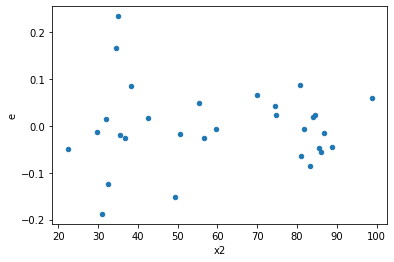

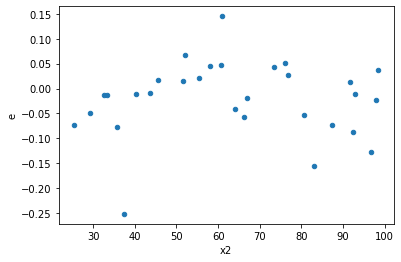

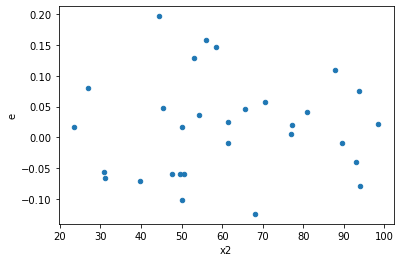

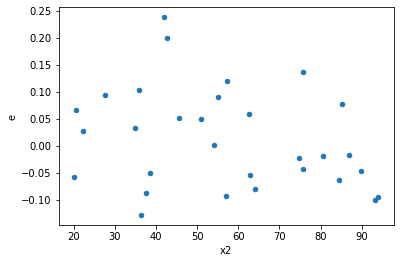

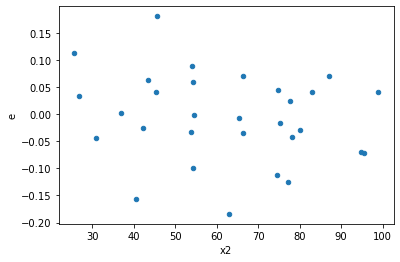

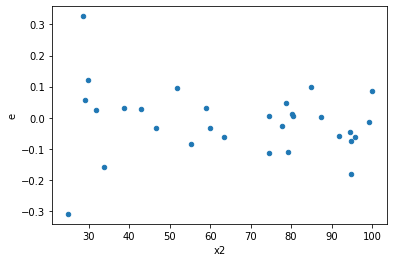

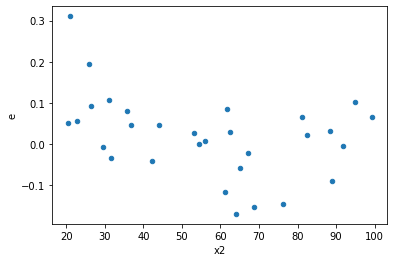

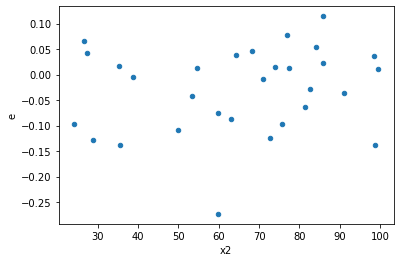

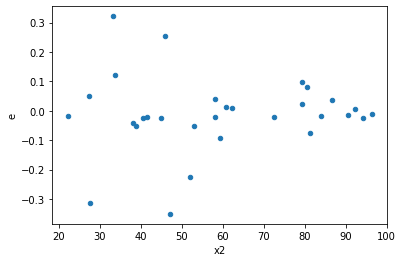

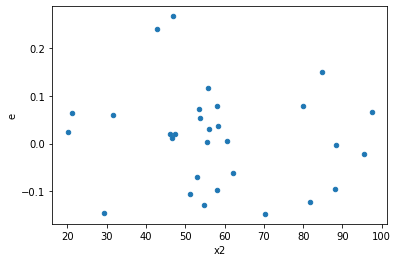

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,14.0,8.0,0.08883786626274523,0.0963002884573968,0.006345561875910373,0.0120375360571746,1.8970008160936294,0.3651979889810386,0.8174010055094807,0.1825989944905193,Reject001=1 : Homoscedasticity
4.0,13.0,9.0,0.056498596435953494,0.08518342076495966,0.0043460458796887305,0.009464824529439963,2.1778013374580034,0.24551377829375842,0.8772431108531208,0.12275688914687921,Reject001=1 : Homoscedasticity
5.0,14.0,8.0,0.07180461813861118,0.24775182732418932,0.0051289012956150844,0.030968978415523665,6.038131098759955,0.015317056046835864,0.9923414719765821,0.007658528023417932,Reject001=1 : Homoscedasticity
6.0,13.0,9.0,0.09538828156831863,0.07106613965407878,0.007337560120639895,0.007896237739342086,1.0761394263919803,0.9369955905419474,0.5315022047290263,0.4684977952709737,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,0.05897565907052436,0.12498930887293079,0.0053614235518658505,0.011362664442993707,2.1193372120431224,0.22856395587576483,0.8857180220621176,0.11428197793788242,Reject001=1 : Homoscedasticity
10.0,8.0,14.0,0.11713102296361054,0.2544205763361532,0.014641377870451317,0.01817289830972523,1.2412013726113236,0.6910413535785711,0.6544793232107144,0.34552067678928555,Reject001=1 : Homoscedasticity
11.0,9.0,13.0,0.025701660339551458,0.11999546809658447,0.0028557400377279395,0.00923042062281419,3.2322342022973567,0.054657924010551806,0.9726710379947241,0.027328962005275903,Reject001=1 : Homoscedasticity
15.0,8.0,14.0,0.04082113066398218,0.1033325992565072,0.005102641332997772,0.007380899946893372,1.4464861363393409,0.5214382940419571,0.7392808529790215,0.26071914702097854,Reject001=1 : Homoscedasticity
17.0,8.0,14.0,0.020300712093348387,0.0607323951922074,0.0025375890116685483,0.004338028228014814,1.7095078076344672,0.3632899583451199,0.81835502082744,0.18164497917255995,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,5.0,0.11809228977229386,0.011194064815376012,0.0069466052807231685,0.0022388129630752022,0.32228878316836407,0.07198331043580541,Reject001=1 : Homoscedasticity
1.0,7.0,15.0,0.03473246636560049,0.05017546497711637,0.004961780909371499,0.003345030998474425,0.6741593511629144,0.6171365016246523,Reject001=1 : Homoscedasticity
2.0,15.0,7.0,0.1158901157133985,0.03268099633794071,0.007726007714226566,0.004668713762562958,0.6042854130168743,0.39037702355914766,Reject001=1 : Homoscedasticity
3.0,14.0,8.0,0.08883786626274523,0.0963002884573968,0.006345561875910373,0.0120375360571746,1.8970008160936294,0.3651979889810386,Reject001=1 : Homoscedasticity
4.0,13.0,9.0,0.056498596435953494,0.08518342076495966,0.0043460458796887305,0.009464824529439963,2.1778013374580034,0.24551377829375842,Reject001=1 : Homoscedasticity
5.0,14.0,8.0,0.07180461813861118,0.24775182732418932,0.0051289012956150844,0.030968978415523665,6.038131098759955,0.015317056046835864,Reject001=1 : Homoscedasticity
6.0,13.0,9.0,0.09538828156831863,0.07106613965407878,0.007337560120639895,0.007896237739342086,1.0761394263919803,0.9369955905419474,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,0.05897565907052436,0.12498930887293079,0.0053614235518658505,0.011362664442993707,2.1193372120431224,0.22856395587576483,Reject001=1 : Homoscedasticity
8.0,10.0,12.0,0.20782919521323473,0.17594501131193224,0.020782919521323474,0.014662084275994353,0.7054872276703431,0.5889797381208963,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      904
Reject001=0 : Heteroscedasticity     96
Name: Result_test, dtype: int64